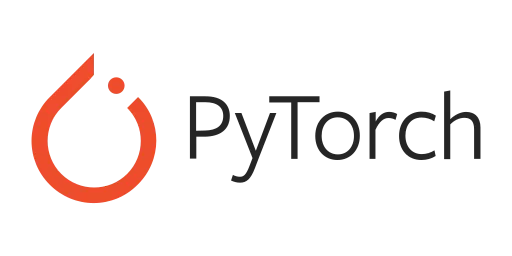

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치 모듈 구조

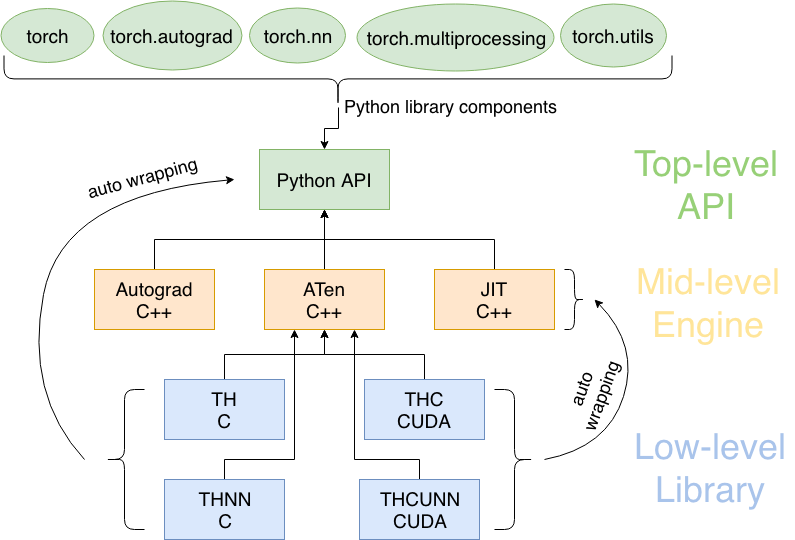

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

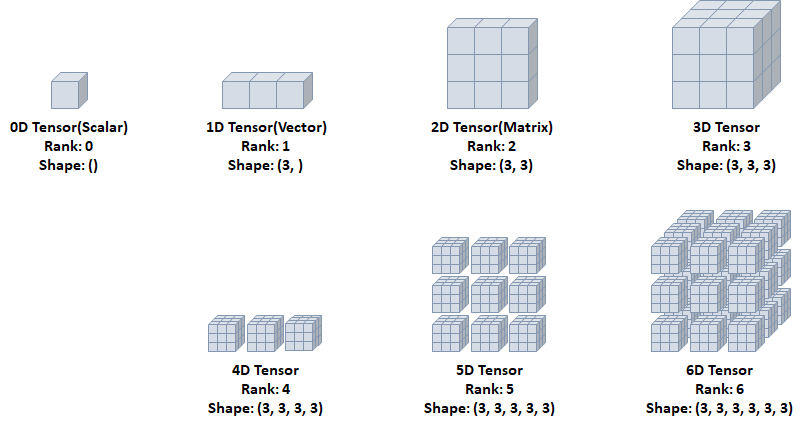

In [2]:
!pip install torch

In [1]:
import torch
torch.__version__                               

'2.4.1+cu121'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [2]:
x = torch.empty(4,2)    # 쓰레기 값
print(x)

tensor([[8.7918e+33, 4.5604e-41],
        [8.7918e+33, 4.5604e-41],
        [1.8834e+29, 4.5604e-41],
        [1.9086e+29, 4.5604e-41]])


무작위로 초기화된 텐서

In [3]:
x = torch.rand(4,2)     # 랜덤값
print(x)

tensor([[0.1985, 0.2906],
        [0.8943, 0.2821],
        [0.1561, 0.9381],
        [0.3488, 0.5546]])


    데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
# int64
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [5]:
#data,grad,grad_fn을 담을 수 있는 변수
x = torch.tensor([3,2.3]) 
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [6]:
x = torch.ones(2,4,dtype=torch.double)
#x = x.new_ones(2,4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [ ]:
# float32
x = torch.rand_like(x, dtype=torch.float) #x와 같은 shape으로
print(x)

tensor([[0.6538, 0.8423, 0.0272, 0.3665],
        [0.7665, 0.7643, 0.6555, 0.7153]])


In [7]:
x = torch.ones_like(x)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([2, 4])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [8]:
# float32
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [9]:
# type casting, ft는 현재 float32
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [10]:
# 정수 int32
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [11]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [14]:
x = torch.randn(1)
print(x)
print(x.item()) # python scalar 값 얻음. tensor에 하나의 값이 아니라 여러개가 존재한다면 사용 불가능
print(x.dtype)

tensor([2.0852])
2.0852086544036865
torch.float32


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
y = torch.ones_like(x, device = device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.], device='cuda:0')
tensor([2.0852], device='cuda:0')
tensor([3.0852], device='cuda:0')
tensor([3.0852], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [ ]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

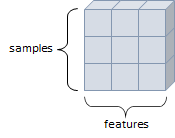

In [ ]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

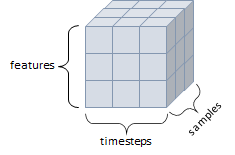

In [ ]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

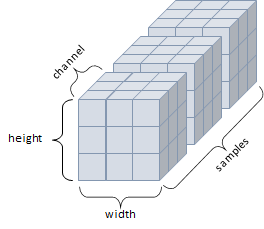

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [63]:
import math
a = torch.rand(1,2)
# print(a)
a = a* 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))    # 현재값보다 큰 정수값
print(torch.floor(a))   # 현재값보다 작은 정수값
print(torch.clamp(a,-0.4,0.4)) #범위 안의 값만 유지 밖은 범위값으로

tensor([[-0.9904,  0.8363]])
tensor([[0.9904, 0.8363]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.4000,  0.4000]])


In [64]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))   # 표준편차
print(torch.prod(a))  # 요소의 곱
print(torch.unique(torch.tensor([1,2,3,1,2,2])))  # 중복값 제거

tensor([[-0.9904,  0.8363]])
tensor(-0.9904)
tensor(0.8363)
tensor(-0.0771)
tensor(1.2917)
tensor(-0.8283)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [21]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0)) #0축은 행, 1축은 열
print(x.max(dim=1))

tensor([[0.8738, 0.7822],
        [0.4620, 0.3888]])
torch.return_types.max(
values=tensor([0.8738, 0.7822]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.8738, 0.4620]),
indices=tensor([0, 0]))


In [22]:
print(x)
print('---')
print(x.min(dim=0))
print('---')
print(x.min(dim=1))

tensor([[0.8738, 0.7822],
        [0.4620, 0.3888]])
---
torch.return_types.min(
values=tensor([0.4620, 0.3888]),
indices=tensor([1, 1]))
---
torch.return_types.min(
values=tensor([0.7822, 0.3888]),
indices=tensor([1, 1]))


In [66]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.0580, 0.2186],
        [0.9879, 0.7944]])
tensor([[0.6137, 0.5041],
        [0.4473, 0.5039]])


`torch.add`: 덧셈

In [67]:
print(x+y)
print(torch.add(x,y))

tensor([[0.6717, 0.7227],
        [1.4352, 1.2982]])
tensor([[0.6717, 0.7227],
        [1.4352, 1.2982]])


결과 텐서를 인자로 제공

In [68]:
result = torch.empty(2,4)
print(result)
torch.add(x,y, out=result)
print(result)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.6717, 0.7227],
        [1.4352, 1.2982]])


/tmp/ipykernel_16871/2894161842.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:28.)
  torch.add(x,y, out=result)


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [71]:
print(x)
print(y)
y.add_(x)   # y.add(x)
print(y)

tensor([[0.0580, 0.2186],
        [0.9879, 0.7944]])
tensor([[0.6717, 0.7227],
        [1.4352, 1.2982]])
tensor([[0.7297, 0.9412],
        [2.4231, 2.0926]])


`torch.sub`: 뺄셈

In [27]:
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub_(y))   # y.sub(x)

tensor([[0.9735, 0.3202],
        [0.0066, 0.6063]])
tensor([[1.7618, 0.8802],
        [0.0654, 1.1275]])
tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])
tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])
tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])


`torch.mul`: 곱셉

In [28]:
print(x)
print(y)
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))   # y.mul_(x)

tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])
tensor([[1.7618, 0.8802],
        [0.0654, 1.1275]])
tensor([[-1.3887, -0.4930],
        [-0.0038, -0.5876]])
tensor([[-1.3887, -0.4930],
        [-0.0038, -0.5876]])
tensor([[-1.3887, -0.4930],
        [-0.0038, -0.5876]])


`torch.div`: 나눗셈

In [29]:
print(x)
print(y)
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])
tensor([[1.7618, 0.8802],
        [0.0654, 1.1275]])
tensor([[-0.4474, -0.6363],
        [-0.8985, -0.4622]])
tensor([[-0.4474, -0.6363],
        [-0.8985, -0.4622]])
tensor([[-0.4474, -0.6363],
        [-0.8985, -0.4622]])


`torch.mm`: 내적(dot product)

In [30]:
print(x)
print(y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[-0.7883, -0.5601],
        [-0.0587, -0.5211]])
tensor([[1.7618, 0.8802],
        [0.0654, 1.1275]])
tensor([[-1.4253, -1.3253],
        [-0.1376, -0.6393]])
tensor([[-1.4253, -1.3253],
        [-0.1376, -0.6393]])
torch.return_types.svd(
U=tensor([[-0.9617, -0.2743],
        [-0.2743,  0.9617]]),
S=tensor([2.0213, 0.3606]),
V=tensor([[ 0.6968,  0.7173],
        [ 0.7173, -0.6968]]))


[SVD 특이값 분해](https://angeloyeo.github.io/2019/08/01/SVD.html#google_vignette)

### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
x = torch.Tensor([[1,2],
                 [3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

print(x[:,0])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x = torch.randn(4,5)
print(x)
y = x.view(20)    # 1차원 reshape
print(y)
z = x.view(5,-1)  # 2차원 reshape -> 5차원
print(z)

tensor([[-0.9641,  0.2036,  0.5857, -0.1443, -0.6998],
        [ 1.7686,  1.2374, -0.0161, -0.0325, -0.6054],
        [-0.5131, -2.1104,  0.0384,  0.3872,  0.0738],
        [ 0.1384, -0.1442, -0.2567, -1.2764, -1.3202]])
tensor([-0.9641,  0.2036,  0.5857, -0.1443, -0.6998,  1.7686,  1.2374, -0.0161,
        -0.0325, -0.6054, -0.5131, -2.1104,  0.0384,  0.3872,  0.0738,  0.1384,
        -0.1442, -0.2567, -1.2764, -1.3202])
tensor([[-0.9641,  0.2036,  0.5857, -0.1443],
        [-0.6998,  1.7686,  1.2374, -0.0161],
        [-0.0325, -0.6054, -0.5131, -2.1104],
        [ 0.0384,  0.3872,  0.0738,  0.1384],
        [-0.1442, -0.2567, -1.2764, -1.3202]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2429])
0.24286684393882751
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [ ]:
x = torch.randn(2)
print(x)
# print(x.item())  # 요소가 하나일 경우에 item 사용 가능
print(x.dtype)

tensor([ 1.4596, -0.2723])
torch.float32


`squeeze`: 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2790, 0.0378, 0.5391],
         [0.8901, 0.6785, 0.6085],
         [0.0492, 0.5419, 0.5479]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()   # 한차원 축소 된 3차원에서 2차원으로
print(t)
print(t.shape)

tensor([[0.2790, 0.0378, 0.5391],
        [0.8901, 0.6785, 0.6085],
        [0.0492, 0.5419, 0.5479]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [31]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.2148, 0.4199, 0.4482],
        [0.8301, 0.3491, 0.7331],
        [0.5579, 0.7657, 0.1463]])
torch.Size([3, 3])


In [32]:
# t는 2차원
tensor = t.unsqueeze(dim=0)   # 0번축 한차원 증가됨 2차원에서 3차원으로
print(tensor)
print(tensor.shape)

tensor([[[0.2148, 0.4199, 0.4482],
         [0.8301, 0.3491, 0.7331],
         [0.5579, 0.7657, 0.1463]]])
torch.Size([1, 3, 3])


In [35]:
# t는 2차원
tensor = t.unsqueeze(dim=2)  # 2번축 한차원 증가됨 2차원에서 3차원으로
print(tensor)
print(tensor.shape)

tensor([[[0.2148],
         [0.4199],
         [0.4482]],

        [[0.8301],
         [0.3491],
         [0.7331]],

        [[0.5579],
         [0.7657],
         [0.1463]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [39]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c=torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[-0.9417,  1.2171, -1.8999],
         [ 1.3916,  0.2271,  0.9063],
         [ 0.1221, -0.4314,  0.2075]]])
tensor([[[-0.6010,  0.7984, -0.7790],
         [ 1.1379, -0.6879,  0.5711],
         [ 1.5115,  1.4530,  0.2038]]])
tensor([[[-0.9417,  1.2171, -1.8999],
         [ 1.3916,  0.2271,  0.9063],
         [ 0.1221, -0.4314,  0.2075]],

        [[-0.6010,  0.7984, -0.7790],
         [ 1.1379, -0.6879,  0.5711],
         [ 1.5115,  1.4530,  0.2038]]])
torch.Size([2, 3, 3])


In [ ]:
c=torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[ 0.8487,  0.4374,  0.5810],
         [ 0.3202,  0.1986, -0.3688],
         [ 0.6819,  2.4024,  1.4788],
         [ 1.3430,  0.4155, -0.0494],
         [ 1.4397, -0.2960, -0.4995],
         [-0.8587,  1.5622, -0.2891]]])
torch.Size([1, 6, 3])


In [ ]:
c=torch.cat((a,b),dim=2)
print(c)
print(c.size())

tensor([[[ 0.8487,  0.4374,  0.5810,  1.3430,  0.4155, -0.0494],
         [ 0.3202,  0.1986, -0.3688,  1.4397, -0.2960, -0.4995],
         [ 0.6819,  2.4024,  1.4788, -0.8587,  1.5622, -0.2891]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor,3,dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.2427, 0.9185, 0.6168, 0.0852, 0.6179, 0.4711],
        [0.6703, 0.6002, 0.8024, 0.4259, 0.5000, 0.2300],
        [0.4271, 0.7486, 0.4535, 0.4114, 0.8013, 0.7226]])
tensor([[0.2427, 0.9185],
        [0.6703, 0.6002],
        [0.4271, 0.7486]])
tensor([[0.6168, 0.0852],
        [0.8024, 0.4259],
        [0.4535, 0.4114]])
tensor([[0.6179, 0.4711],
        [0.5000, 0.2300],
        [0.8013, 0.7226]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [ ]:
tensor = torch.rand(3,6)
t1,t2 = torch.split(tensor,3,dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.0654, 0.7073, 0.2732, 0.5728, 0.0647, 0.6894],
        [0.6068, 0.8029, 0.3384, 0.7598, 0.9219, 0.7358],
        [0.5188, 0.7796, 0.5764, 0.4013, 0.6996, 0.5725]])
tensor([[0.0654, 0.7073, 0.2732],
        [0.6068, 0.8029, 0.3384],
        [0.5188, 0.7796, 0.5764]])
tensor([[0.5728, 0.0647, 0.6894],
        [0.7598, 0.9219, 0.7358],
        [0.4013, 0.6996, 0.5725]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [72]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [73]:
b = a.numpy() #가만히 놔두면 메모리를 공유해서 연동됨
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [74]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [54]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)  # add_()
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산
- torch형 변수(data,grad,grad_fn)에서 사용가능하다.
- numpy형 변수(data)에서는 사용할 수 없다.

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [57]:
a = torch.ones(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [58]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(81., grad_fn=<SumBackward0>)


### 기울기(Gradient)

In [59]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [60]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [61]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [62]:
print(out)
out.backward()
print(out)

tensor(36., grad_fn=<MeanBackward0>)
tensor(36., grad_fn=<MeanBackward0>)


`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3,requires_grad=True)

y = x * 2
while y.data.norm() < 1000:   # 절대값의 합 1000보다 작은 경우 계속 2를 곱함
    y = y * 2

print(y)

tensor([  505.3116,  -760.1441, -1635.5698], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():   # 기울기를 업데이트 하지 않음
    print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


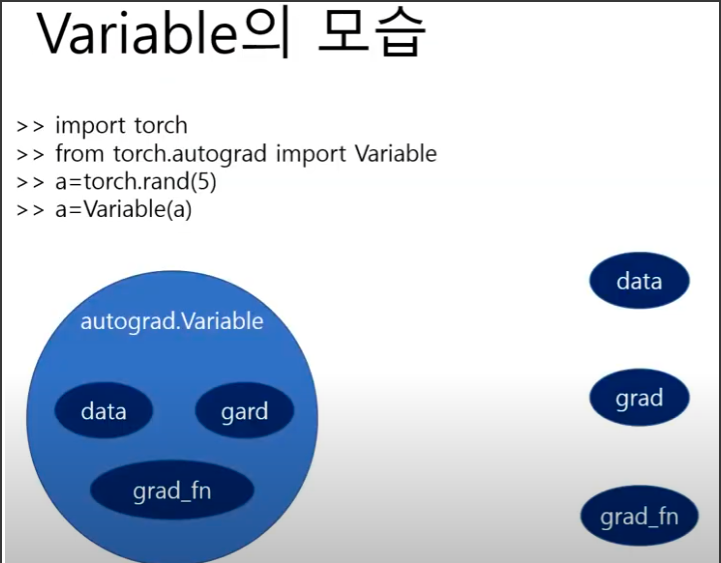

In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [ ]:
# b는 더하기 연산, 자동으로 더하기 미분이 등록됨
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [ ]:
# c는 6에 자승 연산을 함. 자동으로 자승 미분이 등록됨
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


In [ ]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


중간값의 미분 저장
(중간값은 필요없음)

In [1]:
import torch

a = torch.ones(2, 2, requires_grad=True)
b = a + 2
b.retain_grad()  # b에 대해 기울기 저장
c = b ** 2
c.retain_grad()  # c에 대해 기울기 저장
out = c.sum()
out.backward()

print(f'b.data : {b.data}')  #
print(f'b.grad : {b.grad}')  # b의 기울기 출력
print(f'c.data : {c.data}')  #
print(f'c.grad : {c.grad}')  # c의 기울기 출력

b.data : tensor([[3., 3.],
        [3., 3.]])
b.grad : tensor([[6., 6.],
        [6., 6.]])
c.data : tensor([[9., 9.],
        [9., 9.]])
c.grad : tensor([[1., 1.],
        [1., 1.]])


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [1]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [2]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [3]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,),std=(1.0,))])


In [5]:
trainset = datasets.MNIST(root='/home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset',
                          train=True,download=True,
                          transform = mnist_transform)

testset = datasets.MNIST(root='/home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset',
                          train=False,download=True,
                          transform = mnist_transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw/train-images-idx3-ubyte.gz to /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/donggeonyoon/딥러닝 파일/080228/deeplearning/dataset/MNIST/raw



`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [6]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [14]:
import torch
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [17]:
torch_image = torch.squeeze(images[0]) #첫번쨰 사진
images[0].shape,torch_image.shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))

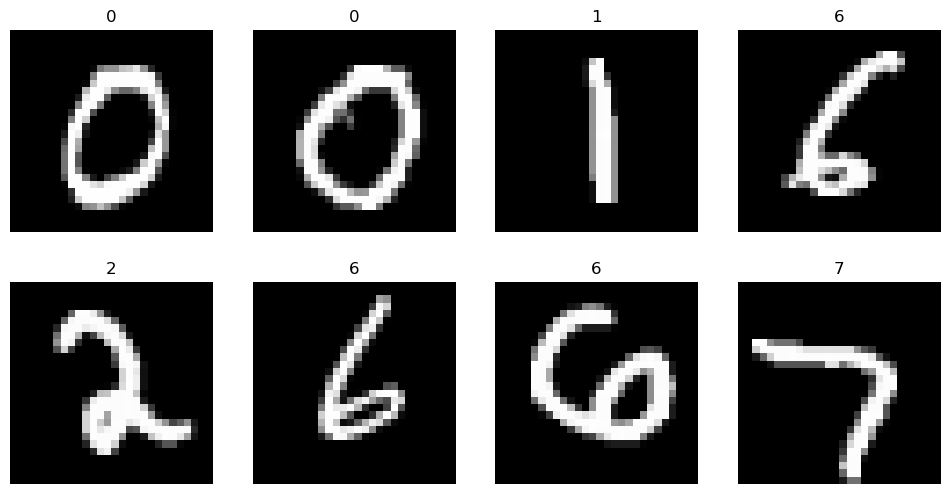

In [35]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols*rows+1): #1~8
    sample_idx = torch.randint(len(trainset),size=(1,)).item() #랜덤텐서에서 값을 꺼낸다.
    # print(sample_idx)
    img, label = trainset[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis('off')
    # print(img.shape) #[1,28,28]
    plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [36]:
import torch.nn as nn

`nn.Linear` 계층 예제 ==(Dense,FCN)

In [38]:
input = torch.randn(128,20)
print('input: ',input)

m = nn.Linear(20,30)
print('m: ',m)

output = m(input)
print('output: ',output)
print(output.size())

input:  tensor([[ 0.9828,  0.9539,  0.3141,  ..., -2.7469,  1.4897, -1.2486],
        [-0.0634, -0.8709, -0.7188,  ..., -0.1595, -0.4968,  0.9933],
        [ 1.8192, -0.5173,  1.1272,  ..., -0.0528, -0.1525,  0.1620],
        ...,
        [-0.4323,  1.4590, -1.2440,  ...,  0.9075,  0.3222, -0.3616],
        [ 2.1946, -1.3036, -0.6310,  ...,  0.3781, -0.5721, -0.6931],
        [-0.5947, -0.0890,  0.1703,  ...,  0.2363,  0.7439,  0.5159]])
m:  Linear(in_features=20, out_features=30, bias=True)
output:  tensor([[ 1.1255, -0.5480,  0.9594,  ..., -0.2826, -0.2420, -0.0366],
        [-1.2480,  0.5205, -0.3444,  ...,  0.7988,  0.6133, -0.3668],
        [-0.4295,  0.5220, -0.9006,  ...,  0.7169,  0.1893,  0.3456],
        ...,
        [ 0.3354, -0.0603, -0.0270,  ..., -0.4454,  0.1115, -1.1328],
        [-0.0709, -0.4299, -0.8367,  ...,  0.7745,  0.4101,  0.6795],
        [ 0.5525,  0.8943,  0.1908,  ...,  1.1569,  0.5325, -0.1124]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시


In [79]:
input = torch.randn(20,16,50,100) #NCHW
print(input.size())

torch.Size([20, 16, 50, 100])


In [80]:
m = nn.Conv2d(16,33,3,stride=2) #출력채널,입력채널,커널사이즈,스트라이드
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding = (4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding = (4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [81]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [39]:
nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [40]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인 - 출력채널,입력채널,커널크기

In [41]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [42]:
weight = weight.detach()

In [43]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

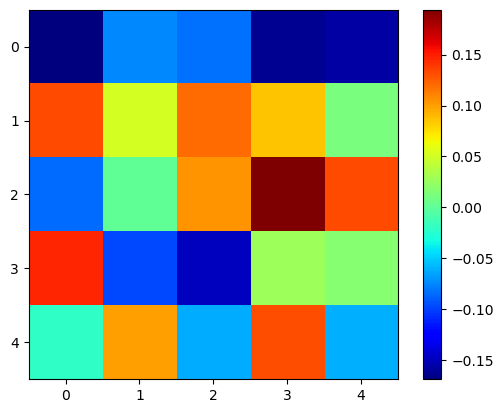

In [44]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [45]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [46]:
input_data = torch.unsqueeze(images[0],dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

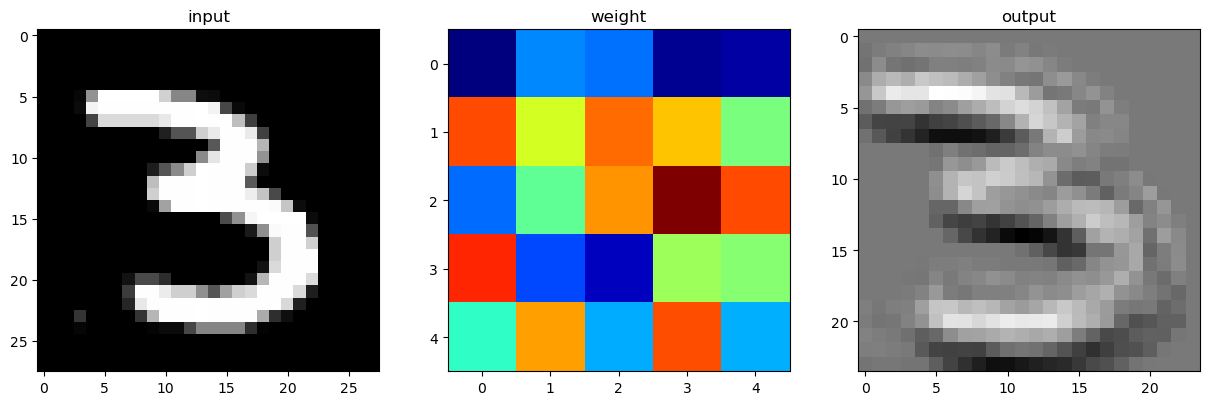

In [49]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title("input")
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title("output")
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [54]:
import torch.nn.functional as F

print('output.shape: ',output.shape)
pool = F.max_pool2d(output,2,2)
pool.shape

output.shape:  torch.Size([1, 20, 24, 24])


torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [55]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

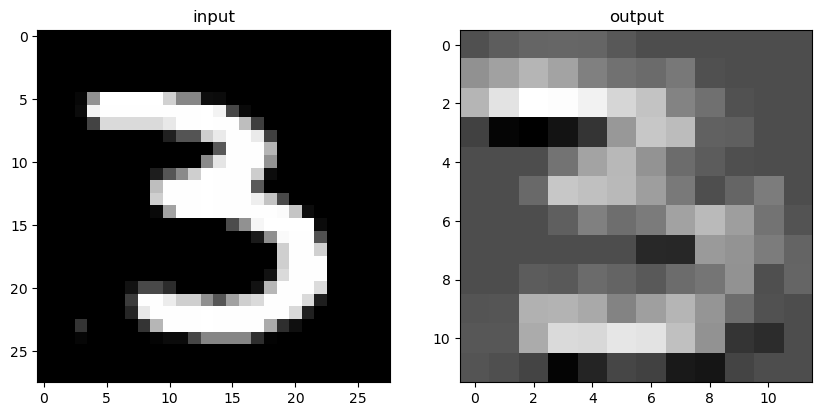

In [62]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title("input")
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title("output")
plt.imshow(pool_arr[0,0,:,:],'gray')
plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [63]:
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [64]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [65]:
lin

tensor([[ 0.2079,  0.0605, -0.1412,  0.0238,  0.1780, -0.2299, -0.0152,  0.0977,
         -0.2641,  0.0623]], grad_fn=<AddmmBackward0>)

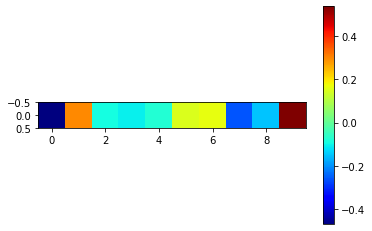

In [ ]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [ ]:
with torch.no_grad():
    flatten = input_image.view(1,28*28)
    lin = nn.Linear(784,10)(flatten)
    softmax = F.softmax(lin,dim=1)

softmax

tensor([[0.0626, 0.1424, 0.0850, 0.0680, 0.1435, 0.1017, 0.0698, 0.1489, 0.0843,
         0.0938]])

In [ ]:
np.sum(softmax.numpy())

1.0

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [ ]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 신경망 종류

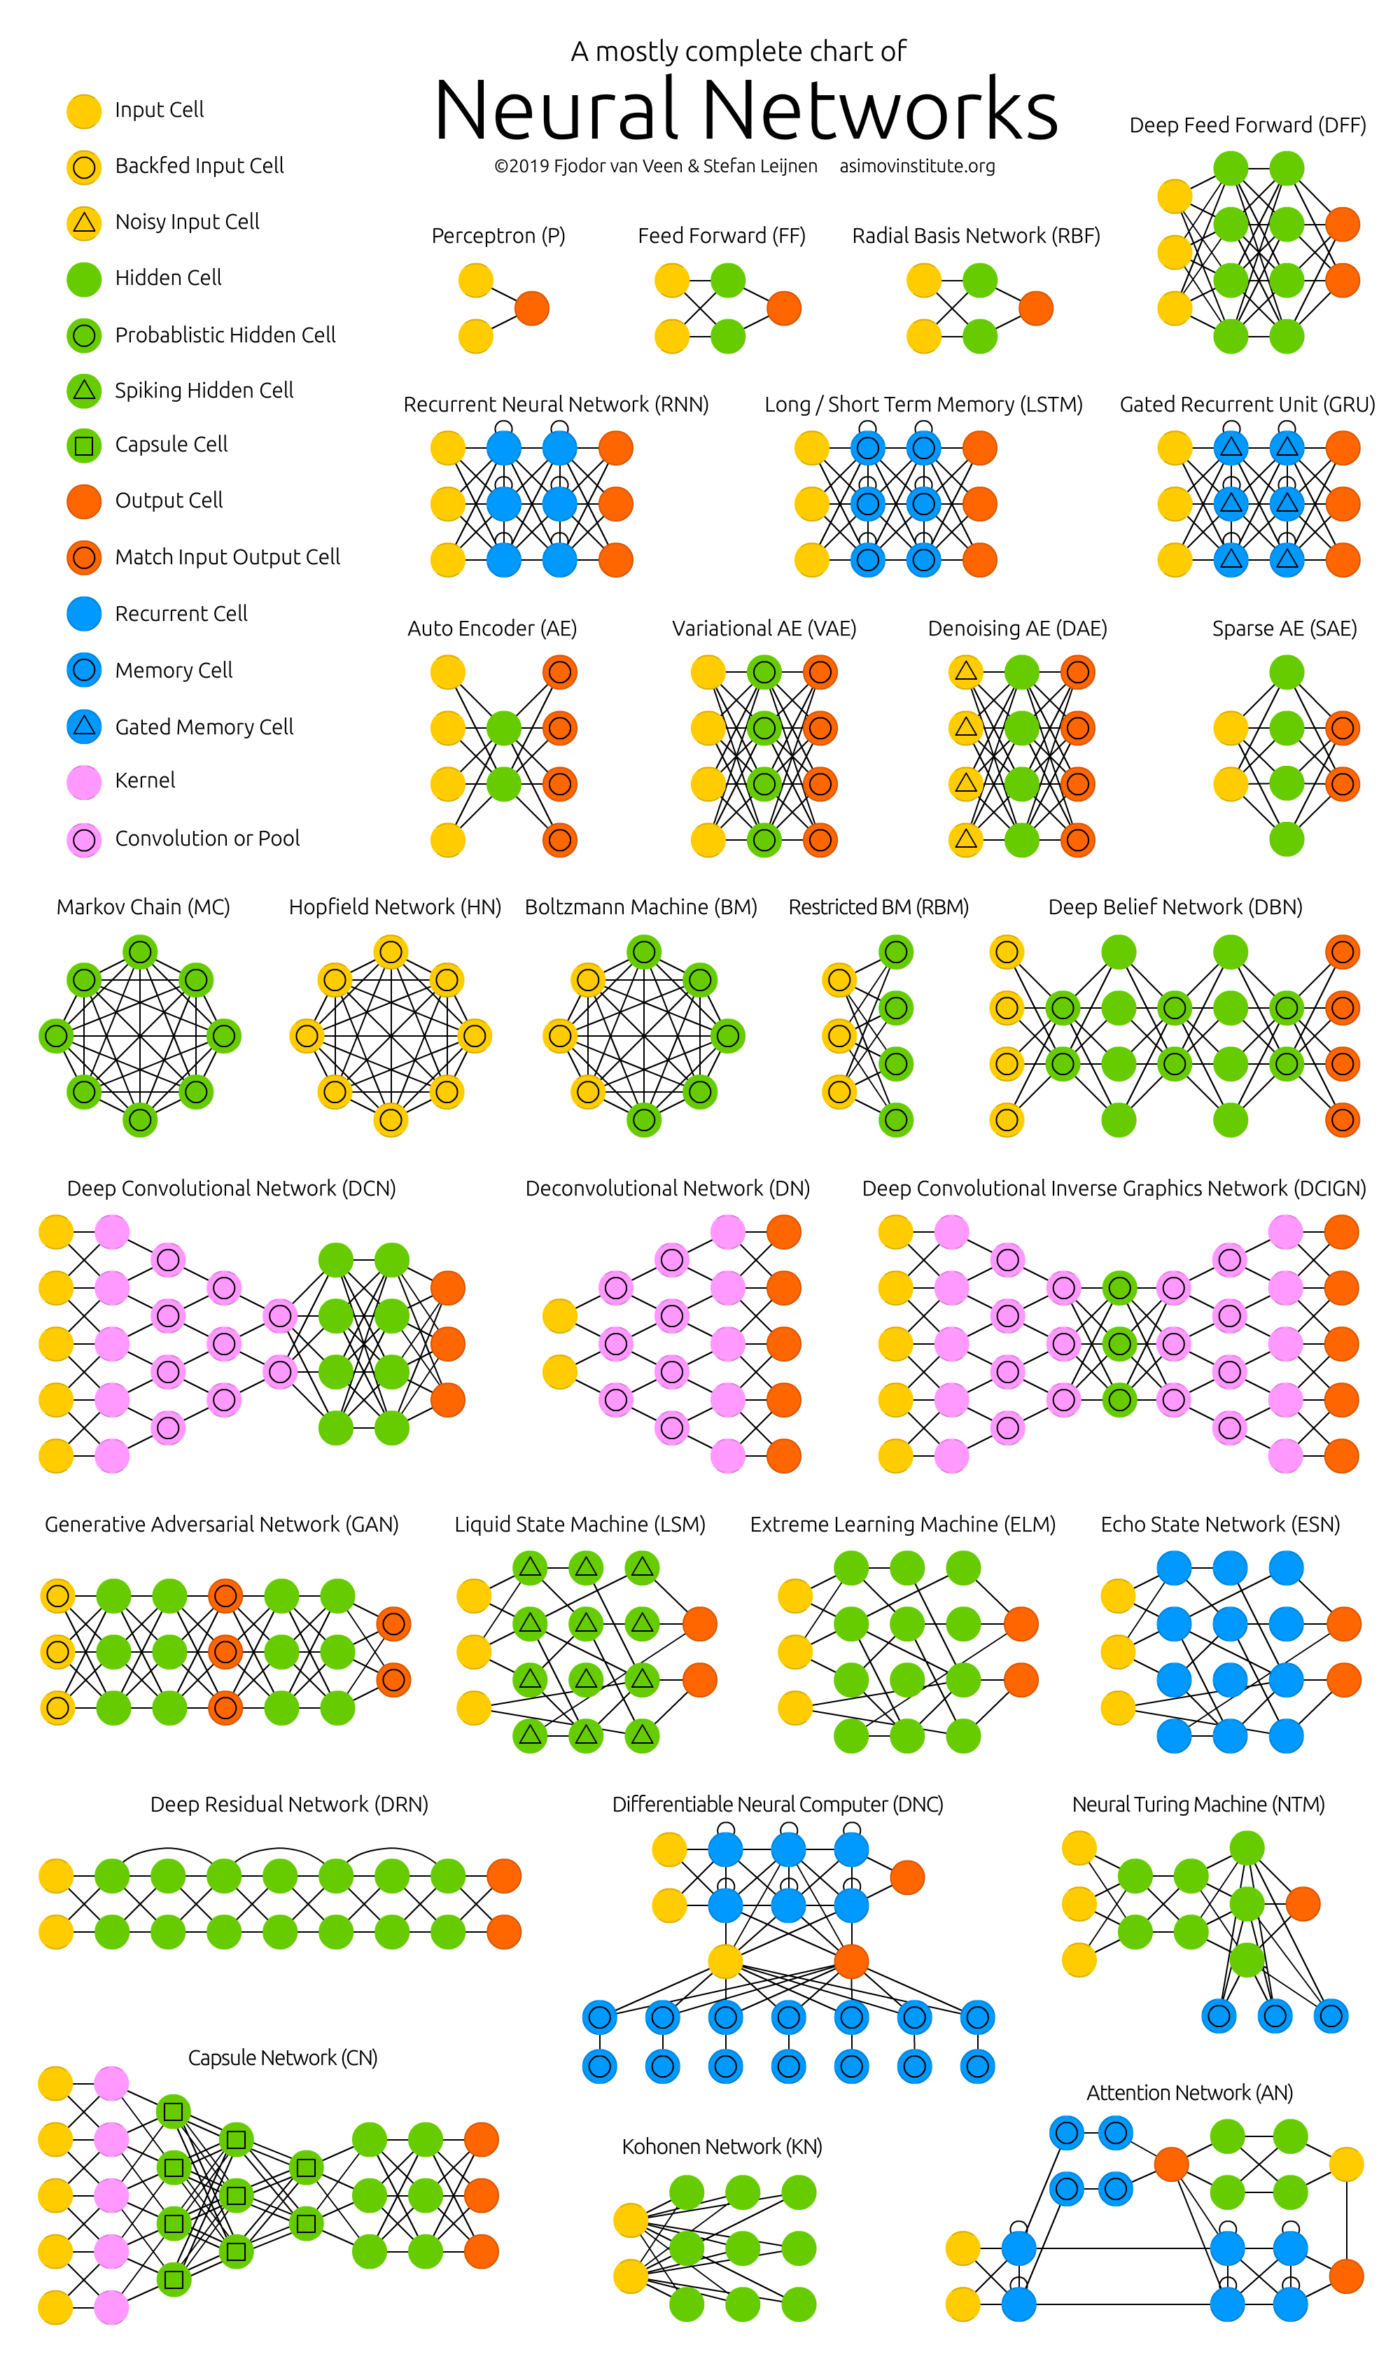

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [ ]:
class Model(nn.Module):
    def __init__(self,inputs):
        super(Model,self).__init__()
        self.layer = nn.Linear(inputs,1)
        self.activation = nn.Sigmoid()

    def forward(self,x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [ ]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=30,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5,out_features=10,bias=True),
            nn.ReLU(inplace=True)
        )

    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0],-1)
        x = self.layer3(x)
        return x


In [ ]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function) 
(텐서플로우에서는 compile 안에)
* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [ ]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [66]:
!pip install torchmetrics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 KB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01


In [68]:
import torchmetrics

preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5,(10,))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target,task='multiclass', num_classes=5)
print(acc)

tensor([[0.0238, 0.0303, 0.0258, 0.8875, 0.0325],
        [0.0858, 0.6518, 0.0204, 0.1140, 0.1280],
        [0.1132, 0.0197, 0.2834, 0.2674, 0.3162],
        [0.0279, 0.0612, 0.2347, 0.2259, 0.4503],
        [0.3739, 0.2443, 0.1180, 0.1545, 0.1093],
        [0.0189, 0.2688, 0.3879, 0.1803, 0.1441],
        [0.0500, 0.5226, 0.2816, 0.0877, 0.0581],
        [0.0424, 0.3052, 0.1810, 0.3123, 0.1591],
        [0.1844, 0.3253, 0.1678, 0.2432, 0.0792],
        [0.1210, 0.0469, 0.7536, 0.0333, 0.0452]]) tensor([3, 2, 1, 1, 2, 0, 1, 1, 3, 0])
tensor(0.2000)


In [ ]:
metric = torchmetrics.Accuracy()

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10,5).softmax(dim=-1)
    ratget = torch.randint(5,(10,))

    acc = metric(preds, target)
    print(acc)

acc = metric.compute()
print(acc)

tensor(0.2000)
tensor(0.3000)
tensor(0.3000)
tensor(0.4000)
tensor(0.1000)
tensor(0.4000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2300)


## 선형 회귀 모델(Linear Regression Model)

### 데이터 생성

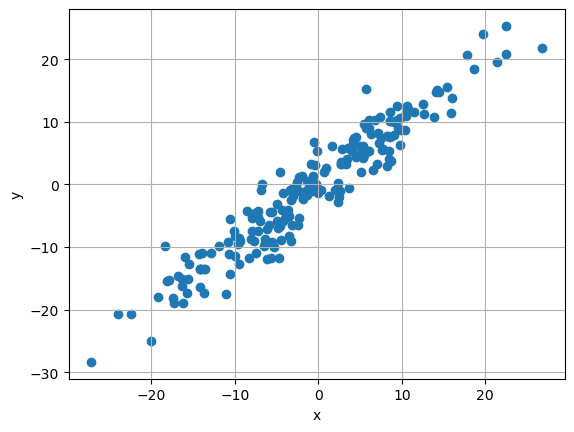

In [69]:
X = torch.randn(200,1)*10
y = X + 3 * torch.randn(200,1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

### 모델 정의 및 파라미터

In [70]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self,x):
        pred = self.linear(x)
        return pred

In [71]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.3810]], requires_grad=True), Parameter containing:
tensor([0.3380], requires_grad=True)]


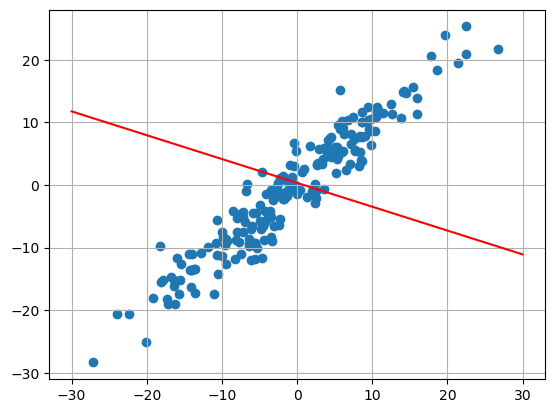

In [73]:
import numpy as np
w, b =model.parameters()

w1,b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [74]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

### 모델 학습

In [75]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

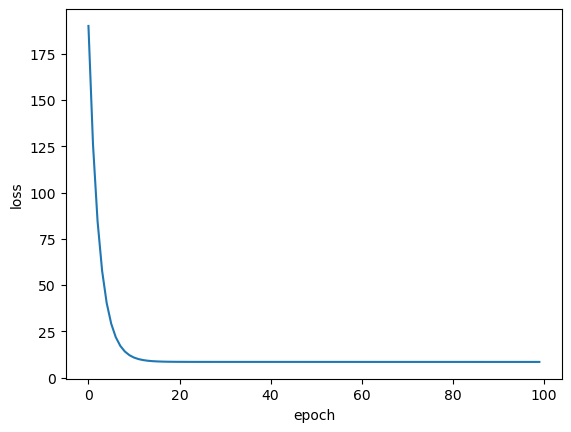

In [76]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

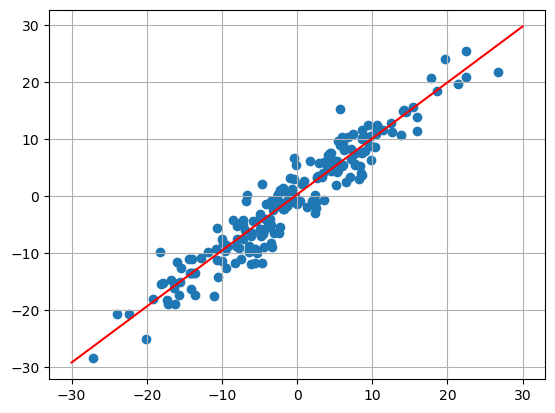

In [77]:
w1,b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### 데이터 로드

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

In [ ]:
trainset = datasets.FashionMNIST(root = '/content/',
                                 train=True,download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root = '/content/',
                                 train=False,download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size = 128, shuffle=True,num_workers=2)
test_loader = DataLoader(testset, batch_size = 128, shuffle=False,num_workers=2)

In [ ]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

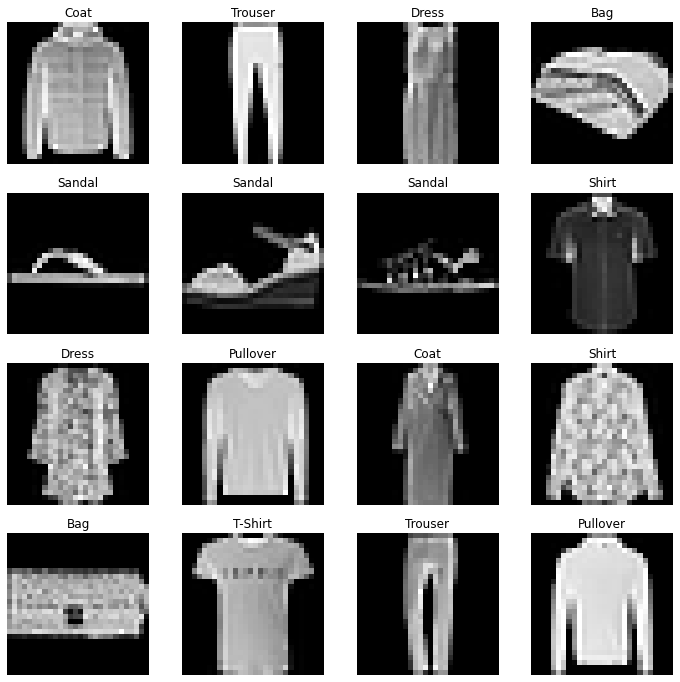

In [ ]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

figure = plt.figure(figsize=(12,12))
cols,rows = 4,4
for i in range(1,cols*rows+1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows,cols,i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
plt.show()

### 모델 정의 및 파라미터

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        #layer셋팅, DenseNet
        self.conv1 = nn.Conv2d(1,6,3)
        self.conv2 = nn.Conv2d(6,16,3)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = NeuralNet()
print(net)


NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.0771,  0.0577,  0.0406, -0.0222, -0.0834,  0.1057, -0.0479, -0.1307,
         -0.0249,  0.0758]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

### 모델 학습

배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


In [ ]:
for epoch in range(10):
    running_loss =0.0
    for i,data in enumerate(train_loader,0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs) #call method
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print('Epoch : {}, lter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

Epoch : 1, lter: 100, Loss: 0.11502851891517639
Epoch : 1, lter: 200, Loss: 0.11463813149929046
Epoch : 1, lter: 300, Loss: 0.11410795676708221
Epoch : 1, lter: 400, Loss: 0.11316798400878907
Epoch : 2, lter: 100, Loss: 0.10746723508834839
Epoch : 2, lter: 200, Loss: 0.09150935244560242
Epoch : 2, lter: 300, Loss: 0.06385443168878556
Epoch : 2, lter: 400, Loss: 0.04944282051920891
Epoch : 3, lter: 100, Loss: 0.040201368182897566
Epoch : 3, lter: 200, Loss: 0.03727776202559471
Epoch : 3, lter: 300, Loss: 0.03581760191917419
Epoch : 3, lter: 400, Loss: 0.03324669334292412
Epoch : 4, lter: 100, Loss: 0.0322962050139904
Epoch : 4, lter: 200, Loss: 0.03127654141187668
Epoch : 4, lter: 300, Loss: 0.03064255566895008
Epoch : 4, lter: 400, Loss: 0.02959868188202381
Epoch : 5, lter: 100, Loss: 0.02945883700251579
Epoch : 5, lter: 200, Loss: 0.028338464081287384
Epoch : 5, lter: 300, Loss: 0.028570467293262482
Epoch : 5, lter: 400, Loss: 0.027936935648322104
Epoch : 6, lter: 100, Loss: 0.0270481

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [ ]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [ ]:
def imshow(image):
    image = image/2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize=(16,8))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

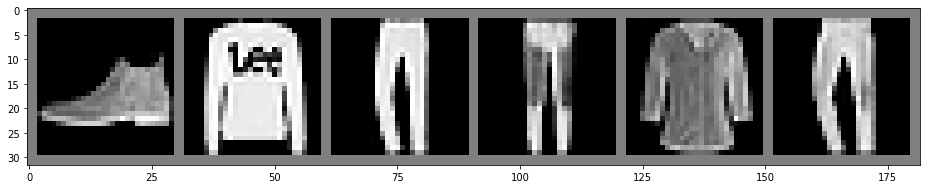

In [ ]:
import torchvision
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = net(images)

_,predicted = torch.max(outputs,1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 9, 6, 1,
        6, 6, 2, 4, 5, 8, 4, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0,
        2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 1, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 3, 7, 8, 5, 9, 9, 4, 6, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [ ]:
print(''.join('{},'.format(labels_map[int(predicted[j].numpy())])for j in range(6)))

Ankle Boot,Pullover,Trouser,Trouser,Shirt,Trouser,


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct+=(predicted == labels).sum().item()
print(100*correct/total)

82.54
